<IPython.core.display.Latex object>

 5


<IPython.core.display.Latex object>

 1000


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

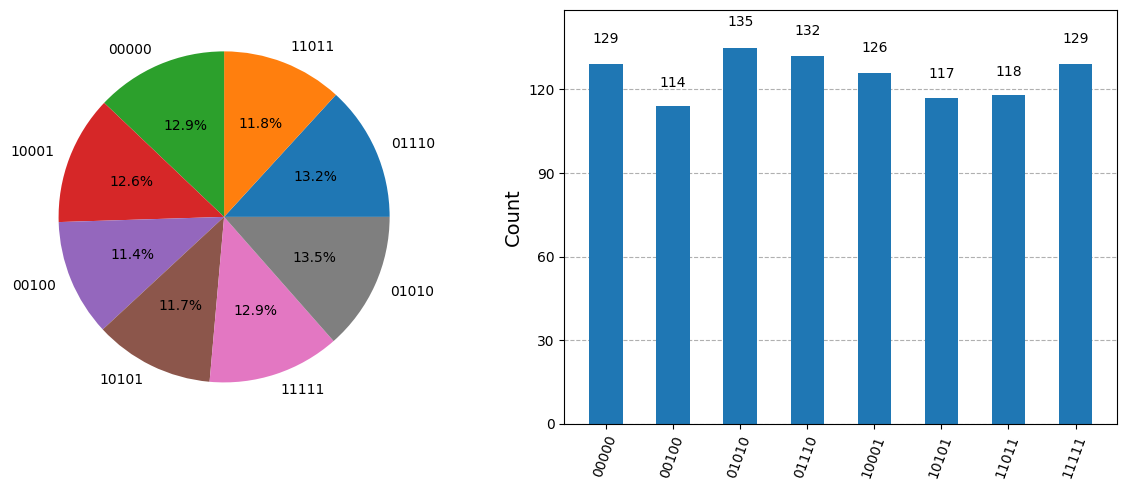

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from numpy import pi, arcsin, sqrt
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from math import floor, ceil

def ZOR(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.mcp(pi, list(range(n - 1)), n - 1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

def ZF(n):
    qc = QuantumCircuit(n)
    pairnum = floor(n / 2)
    checkq = []
    for i in range(pairnum):
        checkq.append(n - 1 - i)
        qc.cx(i, n - 1 - i) 
    qc.x(checkq)
    if checkq:
        targetq = checkq[0]
        controlq = checkq[1:]
        if controlq:
            qc.mcp(pi, controlq, targetq)
        else:
            qc.p(pi, targetq)      
    qc.x(checkq)
    for i in range(pairnum):
        qc.cx(i, n - 1 - i)
    return qc

display(Latex("Enter BitString Length:"))
n = int(input())
display(Latex("Enter Shots Required:"))
shot = int(input())
N = 2**n
M = 2**(ceil(n/2))

theta = arcsin(sqrt(M/N))
iteropt = round((pi / (4 * theta)) - 0.5)
if iteropt < 1: iteropt = 1
display(Latex(f"Optimal Iterations: {iteropt}"))
grovercirc = QuantumCircuit(n)
grovercirc.h(range(n)) 
zorgate = ZOR(n)
zfgate = ZF(n)

for i in range(iteropt):
    grovercirc.append(zfgate, range(n))   
    grovercirc.append(zorgate, range(n)) 

grovercirc.measure_all()
sim = AerSimulator()
t_qc = transpile(grovercirc, sim)
counts = sim.run(t_qc, shots=shot).result().get_counts()
maxcount = max(counts.values())
bound = 0.4 * maxcount 

cleanpalin = {
    k: v for k, v in counts.items() 
    if v > bound
}

resstr = ""
for num in cleanpalin.keys():
    resstr += f"{num}, "

display(Latex(f"List of Palindromes:{resstr}"))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.pie(cleanpalin.values(), labels=cleanpalin.keys(), autopct='%1.1f%%')

plot_histogram(counts, ax=ax2)
plt.tight_layout()
plt.show()